In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [4]:
df=pd.read_csv("/workspaces/ML-Projects/notebook/StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x=df.drop(columns=['math score'],axis=1)

In [8]:
y=df['math score']

In [29]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


In [30]:
print("Categories in 'Gender' Variable:    ",end=" ")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' Variable:    ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental_level_of_education' Variable:    ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' Variable:    ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' Variable:    ",end=" ")
print(df['test preparation course'].unique())

Categories in 'Gender' Variable:     ['female' 'male']
Categories in 'race_ethnicity' Variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' Variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Variable:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' Variable:     ['none' 'completed']


In [31]:
# Create column transformer  with 3 types of tranformers
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features), 
    ]
)

In [33]:
x=preprocessor.fit_transform(x)
x


array([[ 0.96462528, -0.96462528, -0.31256174, ...,  0.74674788,
         0.19399858,  0.39149181],
       [ 0.96462528, -0.96462528, -0.31256174, ..., -1.33914006,
         1.42747598,  1.31326868],
       [ 0.96462528, -0.96462528, -0.31256174, ...,  0.74674788,
         1.77010859,  1.64247471],
       ...,
       [ 0.96462528, -0.96462528, -0.31256174, ..., -1.33914006,
         0.12547206, -0.20107904],
       [ 0.96462528, -0.96462528, -0.31256174, ..., -1.33914006,
         0.60515772,  0.58901542],
       [ 0.96462528, -0.96462528, -0.31256174, ...,  0.74674788,
         1.15336989,  1.18158627]])

In [36]:
x.shape

(1000, 19)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [40]:
# Create an Evaluate Function to give all metrics after model Training

In [46]:
#Create an Evaluate Function to give all metrics after model training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square



In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)    # Train Model
    
    #Make predictions
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.3232
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3909
- Mean Absolute Error: 4.2126
- R2 Score: 0.8806


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 5.9033
- Mean Absolute Error: 4.6909
- R2 Score: 0.8454
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9129
- Mean Absolute Error: 4.6308
- R2 Score: 0.8563


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.2425
- Mean Absolute Error: 6.5540
- R2 Score: 0.6987
-

In [57]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.880568
0,Linear Regression,0.880433
2,Lasso Regression,0.856323
6,Random Forest Regressor,0.852706
5,Catboost Regressor,0.851632
7,AdaBoost Regressor,0.841777
4,XGBoost Regressor,0.827797
8,Decision Tree Regressor,0.727643
3,K-Neighbors Regressor,0.474807


In [58]:
K_model=KNeighborsRegressor()
K_model=K_model.fit(x_train,y_train)
y_pred=K_model.predict(x_test)
score=r2_score(y_test,y_pred)*100

print("Accuracy for the model = {:.2f}".format(score))

Accuracy for the model = 47.48


Text(0, 0.5, 'Predicted')

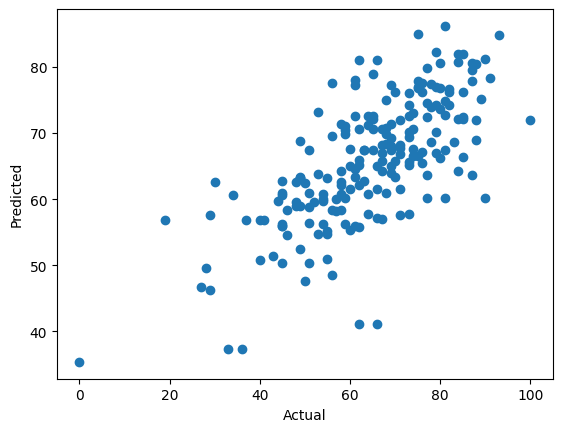

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

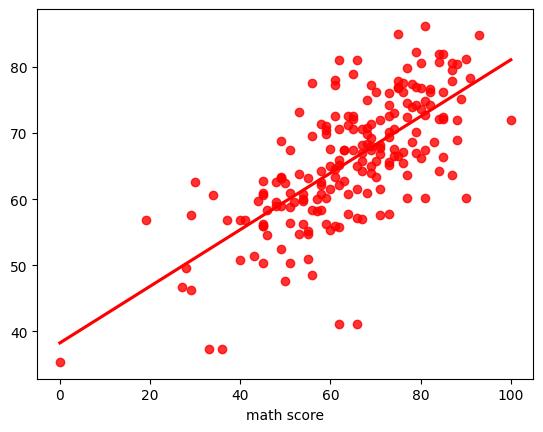

In [60]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [61]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,78.4,12.6
737,53,63.8,-10.8
740,80,66.2,13.8
660,74,67.6,6.4
411,84,80.8,3.2
...,...,...,...
408,52,59.6,-7.6
332,62,81.0,-19.0
208,74,70.6,3.4
613,65,67.4,-2.4
